# FOI requests data analysis

In this notebook, we merge our scraped information from **foi-ph-scraper** to an existing CSV file of older FOI requests so we can make a viable analysis out of them.

Remember that the **foi-ph-scraper** automatically scrapes new information from the website and updates the CSV it generates so make sure you save an updated first data frame ("df") before you run this.

Essentially, the data to be covered here is from **September 2016 to present**.

In [1]:
import pandas as pd
import re
import requests

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Back track: Read df1

If you ran my autoscraper in my other repository **(foi-ph-scraper)**, you just need to save the CSV file generated from the scraper of that repository into your computer. 

Remember that the scraper automatically fetches new data and updates the CSV **every Sunday.**

In [2]:
df1 = pd.read_csv("foi1.csv")
df1

,agency,date,title,status,purpose,period_covered,link
0,PSA,2022-01-20,Copy of PSA Birth certificate (Mary Anne Robis...,PENDING,Clarification for Misrepresentation of COC,01/20/1950 - 01/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
1,DOST-ASTI,2022-01-20,Daily Rainfall Data surrounding Mt. Banahaw fr...,PENDING,Research and Instruction,01/01/2010 - 12/31/2020,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
2,DSWD,2022-01-20,SAP beneficiaries of San Roque Northern Samar,PENDING,Research on Good Governance,04/01/2020 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
3,DA,2022-01-20,Goat and Carabao Dispersal San Roque Northern ...,PENDING,Research on Good Governance,01/01/2013 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
4,SSS,2022-01-20,SSS sickness and EC benefits positive COVID-19,PENDING,Follow on SSS sickness application,09/24/2021 - 10/10/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
...,...,...,...,...,...,...,...
6414,DOH,2021-12-07,VAXCERT,SUCCESSFUL,Follow up request,11/15/2021 - 12/07/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
6415,DOH,2021-12-07,Vax Certificate,SUCCESSFUL,Request for vax certificate,12/01/2021 - 12/07/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
6416,OWWA,2021-12-07,OFW DOLE-AKAP Cash Assistance,SUCCESSFUL,Cash Releasing of DOLE AKAP cash assistance,11/13/2021 - 12/07/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
6417,DOH,2021-12-07,Urgent! Vaccination Certification For Travel,SUCCESSFUL,For Travel on December 9,07/26/2021 - 08/23/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


Our main problem with **df1** is **incomplete data**. While over 6,000 requests appear a lot, in reality, the data only covers about 45 days of requests out of the **past 6 years** that the FOI website has been up.

This is because the PCOO, as we are told, takes down some old FOI requests from its website, most of the time at the request of the poster.

They do keep **a record** of all requests and they are contained in a separate CSV found below.

## Sidebar: change the 'date' column to date format

We forgot to do this after we scraped and we need to do this here for the merging.

In [3]:
df1.date = pd.to_datetime(df1.date)

## Second (and larger) data frame

We asked the PCOO, which manages the FOI website, for earlier data which are all available through "https://docs.google.com/spreadsheets/d/1kblO1_-gL65qXu_EJJBvc59UUHBQ7K3c/edit?fbclid=IwAR1rYDiXlMcllT7Ko4bEJUYGTAIWIloljXhk4EmUhJo0ehHksZ3vYIFDkw0#gid=875187444".

It lists down all requests from **September 2016-December 2021.** We need to clean the data though (i.e. convert dates, remove duplicates) so that we can **merge** it with our scraped data and process and analyze later.

In [4]:
df2 = pd.read_csv('eFOI Raw Data as of 31 December 2021.xlsx - Raw Data as of 31 December 2021.csv')
df2

,DATE CREATED,AGENCY,TITLE OF REQUESTED DOCUMENTS,PERIOD/COVERAGE,PURPOSE,STATUS,EXTENDED?,REASON FOR DENIAL
0,2016-11-25 (01:26:40.574) HKT,DOTr,clark green city update,11/25/2016 - 11/25/2016,for update,CLOSED,NO,—
1,2016-11-25 (01:35:34.481) HKT,PNP,Crime Statatistics and Programs to Combat it,01/01/2000 - 11/25/2016,School Paper,CLOSED,NO,—
2,2016-11-25 (02:22:02.812) HKT,DICT,List of .gov.ph sub-domains,11/25/2015 - 11/25/2016,Research and development,ACCEPTED,NO,—
3,2016-11-25 (07:33:31.050) HKT,DOH,HIV stats in the Philippines,11/25/2015 - 11/25/2016,Personal research,CLOSED,YES,—
4,2016-11-25 (07:50:14.305) HKT,DOH,"Incidence of diarrhea, constipation, and respi...",11/25/2010 - 11/25/2016,Research,PARTIALLY SUCCESSFUL,YES,—
...,...,...,...,...,...,...,...,...
91575,2021-12-31 (22:33:51.182) HKT,DepEd,HAZARD PAY,08/06/2021 - 09/15/2021,For Clarification,SUCCESSFUL,NO,—
91576,2021-12-31 (22:39:04.934) HKT,NAP,Election results of Zamboanga City local elect...,01/01/1937 - 12/31/1955,Research project on local history,PENDING,NO,—
91577,2021-12-31 (22:46:38.459) HKT,NHCP,Election results of Zamboanga City local elect...,01/01/1955 - 12/31/2004,Research project on local history,REFERRED,NO,—
91578,2021-12-31 (23:02:53.564) HKT,DOJ,BRANCH AND DOCKET NO,11/15/2021 - 12/31/2021,SCHEDULE OF HEARING,SUCCESSFUL,NO,—


## Cleaning df2

### Rename the columns

Offhand, you will notice already that two columns are unique here vs. the first df: **extended?** and **reason_denial** which explains reasons for denial. 

We decided to just **drop** the two for now here. We may get back to **reason_denial** during our analysis.

Take note that the **first df** likewise have a unique column for **link**. We will keep that just to ensure we can go back to them for analysis later. That means when this both are merged, there will be **NaNs** under **link**.

In [5]:
df2.columns = ['date', 'agency', 'title', 'period_covered', 'purpose', 'status', 'extended', 'reason_denial']
df2 = df2.drop(['reason_denial', 'extended'], axis= 1)
df2

,date,agency,title,period_covered,purpose,status
0,2016-11-25 (01:26:40.574) HKT,DOTr,clark green city update,11/25/2016 - 11/25/2016,for update,CLOSED
1,2016-11-25 (01:35:34.481) HKT,PNP,Crime Statatistics and Programs to Combat it,01/01/2000 - 11/25/2016,School Paper,CLOSED
2,2016-11-25 (02:22:02.812) HKT,DICT,List of .gov.ph sub-domains,11/25/2015 - 11/25/2016,Research and development,ACCEPTED
3,2016-11-25 (07:33:31.050) HKT,DOH,HIV stats in the Philippines,11/25/2015 - 11/25/2016,Personal research,CLOSED
4,2016-11-25 (07:50:14.305) HKT,DOH,"Incidence of diarrhea, constipation, and respi...",11/25/2010 - 11/25/2016,Research,PARTIALLY SUCCESSFUL
...,...,...,...,...,...,...
91575,2021-12-31 (22:33:51.182) HKT,DepEd,HAZARD PAY,08/06/2021 - 09/15/2021,For Clarification,SUCCESSFUL
91576,2021-12-31 (22:39:04.934) HKT,NAP,Election results of Zamboanga City local elect...,01/01/1937 - 12/31/1955,Research project on local history,PENDING
91577,2021-12-31 (22:46:38.459) HKT,NHCP,Election results of Zamboanga City local elect...,01/01/1955 - 12/31/2004,Research project on local history,REFERRED
91578,2021-12-31 (23:02:53.564) HKT,DOJ,BRANCH AND DOCKET NO,11/15/2021 - 12/31/2021,SCHEDULE OF HEARING,SUCCESSFUL


### Convert date to date time

We use regex here.

In [6]:
df2['date'] = df2.date.str.replace("HKT", "")
df2['date'] = df2.date.str.replace(r'[()](\d\d[:]\d\d[:]\d\d[.]\d\d\d)[()]', '', regex=True)
df2.date = pd.to_datetime(df2.date)
df2.head()

,date,agency,title,period_covered,purpose,status
0,2016-11-25,DOTr,clark green city update,11/25/2016 - 11/25/2016,for update,CLOSED
1,2016-11-25,PNP,Crime Statatistics and Programs to Combat it,01/01/2000 - 11/25/2016,School Paper,CLOSED
2,2016-11-25,DICT,List of .gov.ph sub-domains,11/25/2015 - 11/25/2016,Research and development,ACCEPTED
3,2016-11-25,DOH,HIV stats in the Philippines,11/25/2015 - 11/25/2016,Personal research,CLOSED
4,2016-11-25,DOH,"Incidence of diarrhea, constipation, and respi...",11/25/2010 - 11/25/2016,Research,PARTIALLY SUCCESSFUL


## Merging the two dfs

Combine the two dfs into one

In [7]:
df_final = pd.concat([df1,df2]).drop_duplicates().reset_index(drop=True)
df_final = df_final.sort_values('date').reset_index(drop=True)
df_final

,agency,date,title,status,purpose,period_covered,link
0,DOTr,2016-11-25,SALN of Bongbong Marcos,DENIED,School Paper Research(Thesis),11/25/2016 - 11/25/2016,NaN
1,DICT,2016-11-25,"Request for Architecture of SSS, Pagibig, Phil...",ACCEPTED,To validate if our data is properly secured.,01/01/2016 - 11/25/2016,NaN
2,PCGG,2016-11-25,HIRING GOVERNMENT CAREER EMPLOYEES (RANK AND F...,DENIED,PUBLIC INFORMATION,11/25/2016 - 11/25/2016,NaN
3,PSA,2016-11-25,"The amount of yellowfin, skipjack, bigeye tuna...",DENIED,Research and Development,01/01/2010 - 12/31/2015,NaN
4,PCOO,2016-11-25,HIRING GOVERNMENT CAREER EMPLOYEES (RANK AND F...,PARTIALLY SUCCESSFUL,PUBLIC INFORMATION,11/25/2016 - 11/25/2016,NaN
...,...,...,...,...,...,...,...
96087,DOH,2022-01-20,Floor plan of Tondo Medical Center,PENDING,Academic Case Study,01/20/2022 - 01/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
96088,BOI,2022-01-20,Herbal/Medicinal Plant Industry,PENDING,Thesis Research,01/01/2017 - 11/27/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
96089,DTI,2022-01-20,Companies in the Herbal or Medicinal Plant Ind...,PENDING,Thesis Research,01/01/2017 - 11/27/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
96090,ECC,2022-01-20,COvid positive sickness Benifits,PENDING,Question or Inquiry,12/31/2021 - 01/16/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


## Looking into the NaNs

We already dropped the duplicates, now we look for null values.

In [8]:
df_final.isna().value_counts()

agency  date   title  status  purpose  period_covered  link 
False   False  False  False   False    False           True     90748
                                                       False     5341
               True   False   False    False           True         2
               False  False   True     False           True         1
dtype: int64

## Analysis

Now that we have all the requests contained in one file, we can now analyze them, still using pandas.

## How much of the requests are granted or denied?

In [23]:
df_final.status.value_counts(normalize=True) * 100

SUCCESSFUL                42.499896
DENIED                    27.003289
PENDING                    9.814553
PARTIALLY SUCCESSFUL       7.669733
ACCEPTED                   4.186613
CLOSED                     3.604879
AWAITING CLARIFICATION     2.519461
REFERRED                   1.690047
PROCESSING                 0.996961
EXTENDED                   0.014569
Name: status, dtype: float64

<AxesSubplot:>

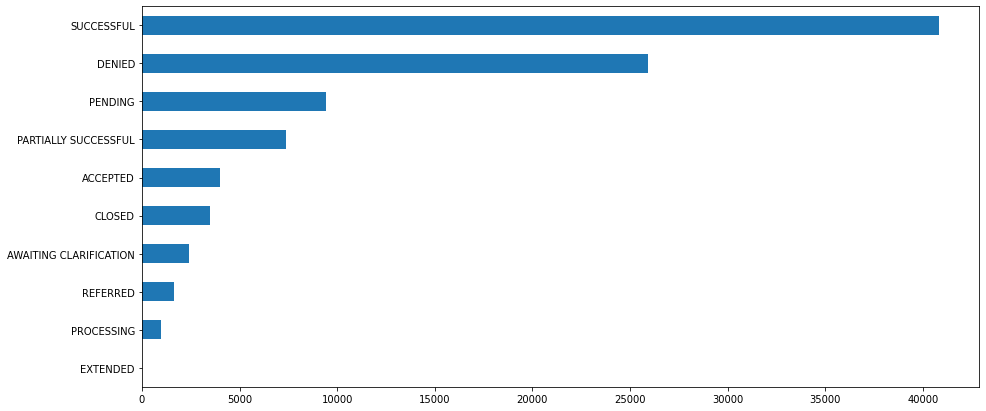

In [27]:
df_final.status.value_counts().sort_values().plot(kind='barh', figsize=(15,7))

Note: We are still seeking clarification from PCOO on what **CLOSED** means. Meanwhile, over one in four FOI requests are denied by agencies. Over half are **successful** or **partially sucessful**. 

## Which agencies get the most FOI requests?

In [10]:
df_final.agency.value_counts().head(10)

DOH      6731
PSA      5760
DOLE     5202
SSS      4200
OWWA     3998
BIR      3850
DepEd    3833
DSWD     3622
NTC      2953
DPWH     2492
Name: agency, dtype: int64

The Department of Health, Philippine Statistics Authority and the labor department get the most requests.

## Which agencies deny the most requests?

The Bureau of Internal Revenue tops the list, although a deeper probe would show most of the denials were a result of requests for personal tax records, which are not for public consumption.

In [13]:
df_final[df_final.status=="DENIED"].agency.value_counts().head(10)

BIR     2440
DSWD    2274
DENR    1268
DOH     1065
DTI     1050
DOLE     829
DOTr     781
HDMF     659
DILG     590
SSS      523
Name: agency, dtype: int64

In [18]:
df_final[df_final.agency=="BIR"]

,agency,date,title,status,purpose,period_covered,link
2509,BIR,2017-11-23,2015 Corporate Income tax and Value Added Tax ...,DENIED,Research,01/01/2015 - 12/31/2015,NaN
2510,BIR,2017-11-23,2015 Income tax collection by household decile,DENIED,Research,01/01/2015 - 12/31/2015,NaN
2511,BIR,2017-11-23,List of priority PEZA and BOI industries enjoy...,DENIED,Research,11/23/2017 - 11/23/2017,NaN
2773,BIR,2018-01-09,Effective tax rate on annual salary in 1998-2018,DENIED,School Thesis,01/09/1998 - 01/09/2018,NaN
2803,BIR,2018-01-13,Tax Calculation for Commissions & Other Taxabl...,SUCCESSFUL,Payroll System Implementation for MWE salaries,01/02/2018 - 01/02/2018,NaN
...,...,...,...,...,...,...,...
96024,BIR,2022-01-19,Copies of BIR Form 2316,AWAITING CLARIFICATION,Skills Assessment Requirement (Australia),01/01/2006 - 12/31/2014,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
96027,BIR,2022-01-19,Income Tax Return Document,DENIED,Loan requirement,01/01/2021 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
96046,BIR,2022-01-19,Copy of RR/RMO/RMC or other/s for the Template...,PENDING,Research and Development,01/01/1999 - 01/19/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...
96047,BIR,2022-01-19,ITR,PENDING,For work/employment purposes,07/01/2019 - 07/30/2020,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...


## SALN requests, anyone?

Stands for "Statements of Assets, Liabilities and Net Worth" filed by public officials every year.

In [46]:
df_final.title.str.contains("SALN", regex=False, case=False).value_counts()

False    95891
True       199
Name: title, dtype: int64

Nearly 200 requests using the exact words "SALN" on the FOI portal. Below, we use a regex pattern to screen this more.

In [44]:
df_final.title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE)

,,0
,match,
0,0,SALN of Bongbong Marcos
145,0,"SALN of the following: Ronnan Y. Pado, Ernani ..."
271,0,SALN of Niño Maximino A. Lazaro Municipal Coun...
291,0,The SALNs of each of the cabinet members of th...
345,0,The SALNs of Presidents Aquino and Duterte's C...
...,...,...
91462,0,"Malnourished Children in Naga City, Camarines Sur"
91485,0,"Malnourished Children in Naga City, Camarines Sur"
93446,0,SALN Request & Accomplishments & Report of Off...


There were larger numbers of requests for SALN using regex, but noticed that some of the requests highlighted using the pattern weren't really about SALN. We will explore this more.

## Track request numbers through time

### By month

<AxesSubplot:title={'center':'Rising FOI requests trend'}, xlabel='date'>

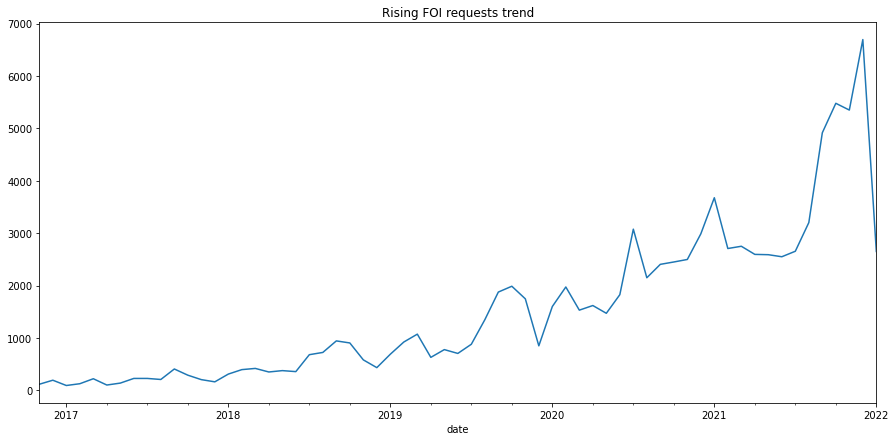

In [57]:
df_final.resample('M', on='date').title.count().plot(title="Rising FOI requests trend", figsize=(15,7))

In [60]:
df_final.resample('M', on='date').title.count().sort_values(ascending=False).head(10)
#Largest number of FOI requests recorded in December 2021.

date
2021-12-31    6694
2021-10-31    5478
2021-11-30    5349
2021-09-30    4916
2021-01-31    3676
2021-08-31    3202
2020-07-31    3076
2020-12-31    2987
2021-03-31    2750
2021-02-28    2707
Name: title, dtype: int64

### By year

<AxesSubplot:title={'center':'Rising FOI requests trend'}, xlabel='date'>

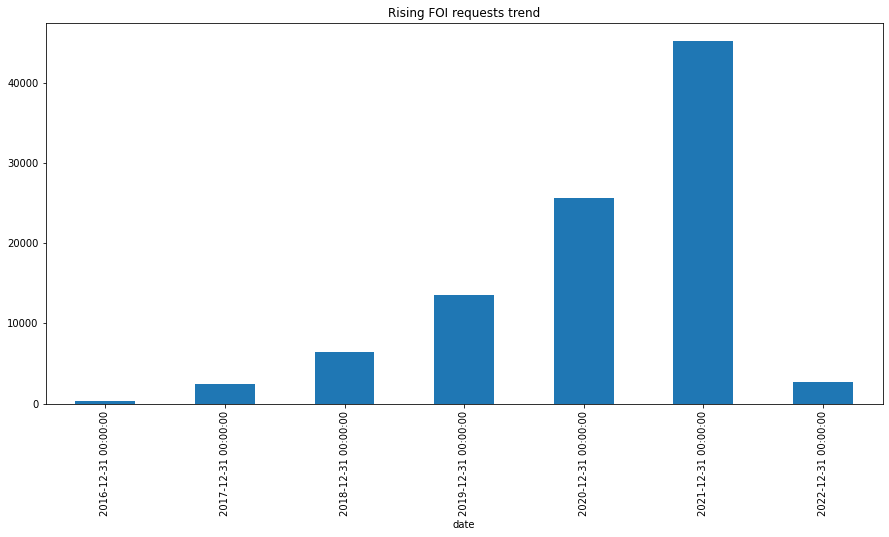

In [63]:
df_final.resample('A', on='date').title.count().plot(kind="bar", title="Rising FOI requests trend", figsize=(15,7))

## Save combined df to CSV

In [ ]:
#df_final.to_csv("foi_all.csv", index=False)
#pd.read_csv("foi_all.csv")